Import Libraries

In [58]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

Reading Dataset And Get Info

In [59]:
df= pd.read_csv("..\dataset\Car details v3.csv")

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\hp\AppData\Local\Temp\ipykernel_1056\1891894517.py:1: SyntaxWarning: invalid escape sequence '\d'
  df= pd.read_csv("..\dataset\Car details v3.csv")


In [60]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [61]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [62]:
df.shape

(8128, 13)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [64]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


Handling Missing Data & Duplicates

In [65]:
df.drop_duplicates(inplace=True)

In [66]:
df.shape

(6926, 13)

In [67]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          208
engine           208
max_power        205
torque           209
seats            208
dtype: int64

In [68]:
df.dropna(how='any',inplace=True)

In [69]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

Data Preprocessing

In [70]:
# Replace Model of each car to only Name of Brand
Brands_of_car=df['name'].to_list()
for i in range(len(Brands_of_car)):
    car=Brands_of_car[i].split(' ')
    Brands_of_car[i]=car[0]
df['name'] = Brands_of_car

In [71]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [72]:
#Handling Object DataType
df["mileage"] = df["mileage"].apply(lambda x: float(x.split()[0]))
df['engine']=df['engine'].apply(lambda x:float(x.split()[0]))
df['max_power']=df['max_power'].apply(lambda x:float(x.split()[0]))

In [73]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [74]:
#Delete the column 'torque'
df.drop(columns='torque',axis=1,inplace=True)

In [75]:
#Make the price last Column
selling_price=df['selling_price']
df.drop(columns='selling_price',axis=1,inplace=True)
df['selling_price']=selling_price

In [76]:
df.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price
0,Maruti,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,450000
1,Skoda,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,370000
2,Honda,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,158000
3,Hyundai,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,225000
4,Maruti,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,130000


In [77]:
#Encode Object DataType
encoder=LabelEncoder()
endcoded_columns=['name','fuel','seller_type','transmission','owner']
for col in endcoded_columns :
    df[col]=encoder.fit_transform(df[col])


In [78]:
df.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price
0,20,2014,145500,1,1,1,0,23.40,1248.0,74.00,5.0,450000
1,26,2014,120000,1,1,1,2,21.14,1498.0,103.52,5.0,370000
2,10,2006,140000,3,1,1,4,17.70,1497.0,78.00,5.0,158000
3,11,2010,127000,1,1,1,0,23.00,1396.0,90.00,5.0,225000
4,20,2007,120000,3,1,1,0,16.10,1298.0,88.20,5.0,130000


In [79]:
#Assign feature and target variables
X=df.drop(columns='selling_price',axis=1)
Y=df['selling_price']

In [80]:
#Splitting Data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [81]:
print(f'Shape of X_Train {X_train.shape}')
print(f'Shape of X_Test {X_test.shape}')
print(f'Shape of Y_Train {Y_train.shape}')
print(f'Shape of Y_Test {Y_test.shape}')

Shape of X_Train (5373, 11)
Shape of X_Test (1344, 11)
Shape of Y_Train (5373,)
Shape of Y_Test (1344,)


Modeling

In [82]:
model=RandomForestRegressor(n_estimators=100,max_depth=10)
model.fit(X_train,Y_train)

RandomForestRegressor(max_depth=10)

In [83]:
y_pred=model.predict(X_test)
mse=mean_squared_error(Y_test,y_pred)
rmse = np.sqrt(mse)
mae=mean_absolute_error(Y_test,y_pred)
r2=r2_score(Y_test,y_pred) 
print('Model Performance Metrics:')
print("Mean_squared_error :",mse)
print("Root mean_squared_error :",rmse)
print("Mean_absolute_error :",mae)
print("R2_score :",r2)

Model Performance Metrics:
Mean_squared_error : 17657740948.850273
Root mean_squared_error : 132882.4328075396
Mean_absolute_error : 78615.91308181202
R2_score : 0.9195293323610146


C:\Users\hp\AppData\Local\Temp\ipykernel_1056\1270988761.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance,palette="viridis")


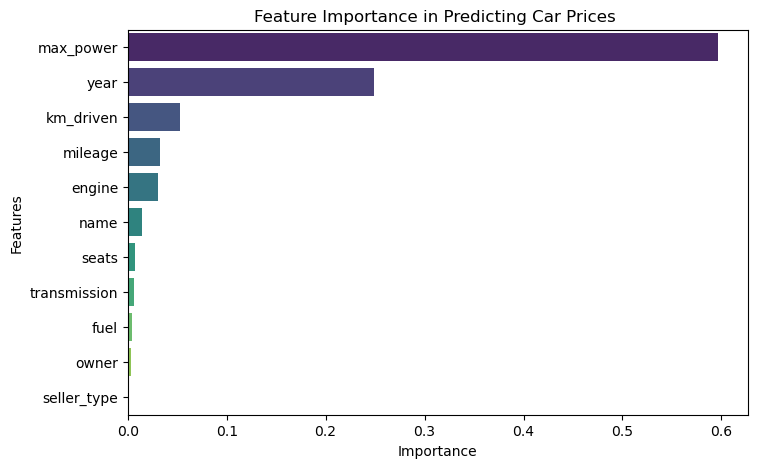

In [ ]:
# Feature Importance Visualization
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='importance', y='feature', data=feature_importance,palette="viridis")
plt.title('Feature Importance in Predicting Car Price ')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

Save the model and label encoders

In [ ]:
import pickle

label_encoder_name=LabelEncoder()
label_encoder_name.fit(df['name'])

label_encoder_fuel = LabelEncoder()
label_encoder_fuel.fit(df['fuel'])

label_encoder_seller = LabelEncoder()
label_encoder_seller.fit(df['seller_type'])

label_encoder_trans = LabelEncoder()
label_encoder_trans.fit(df['transmission'])

label_encoder_owner = LabelEncoder()
label_encoder_owner.fit(df['owner'])

pickle.dump(model, open('car_price__model.sav', 'wb'))
pickle.dump(label_encoder_name, open('label_encoder_name.sav', 'wb'))
pickle.dump(label_encoder_fuel, open('label_encoder_fuel.sav', 'wb'))
pickle.dump(label_encoder_seller, open('label_encoder_seller.sav', 'wb'))
pickle.dump(label_encoder_trans, open('label_encoder_trans.sav', 'wb'))
pickle.dump(label_encoder_owner,open('label_encoder_owner.sav','wb'))